In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

# Load the merged data CSV
data = pd.read_csv('/content/merged_data.csv')

# Show the first few rows to check the data
print(data.head())

# Show column names to ensure we know the structure
print(data.columns)


              ts_event  bid_fill  ask_fill  Signed Volume   price  best_bid  \
0  2024-10-22 08:00:00     801.0    1999.0        -1198.0  236.14    235.83   
1  2024-10-22 08:00:01     201.0     202.0           -1.0  236.13    235.83   
2  2024-10-22 08:00:02    1600.0    1400.0          200.0  235.83    235.83   
3  2024-10-22 08:00:03     534.0     400.0          134.0  236.10    235.96   
4  2024-10-22 08:00:04     400.0     502.0         -102.0  236.11    235.96   

   best_ask  mid_price  
0    236.14    235.985  
1    236.13    235.980  
2    236.11    235.970  
3    236.10    236.030  
4    236.11    236.035  
Index(['ts_event', 'bid_fill', 'ask_fill', 'Signed Volume', 'price',
       'best_bid', 'best_ask', 'mid_price'],
      dtype='object')


In [2]:
data

,ts_event,bid_fill,ask_fill,Signed Volume,price,best_bid,best_ask,mid_price
0,2024-10-22 08:00:00,801.0,1999.0,-1198.0,236.14,235.83,236.14,235.985
1,2024-10-22 08:00:01,201.0,202.0,-1.0,236.13,235.83,236.13,235.980
2,2024-10-22 08:00:02,1600.0,1400.0,200.0,235.83,235.83,236.11,235.970
3,2024-10-22 08:00:03,534.0,400.0,134.0,236.10,235.96,236.10,236.030
4,2024-10-22 08:00:04,400.0,502.0,-102.0,236.11,235.96,236.11,236.035
...,...,...,...,...,...,...,...,...
27702,2024-10-22 23:58:59,32.0,0.0,32.0,235.54,235.54,235.81,235.675
27703,2024-10-22 23:59:00,40.0,40.0,0.0,235.54,235.23,235.81,235.520
27704,2024-10-22 23:59:37,0.0,1.0,-1.0,235.70,235.23,235.70,235.465
27705,2024-10-22 23:59:41,5.0,0.0,5.0,235.60,235.60,235.70,235.650


# ***Important Columns to Focus On:***
**Signed volume:** This is the key column that represents the trade size .
**We'll use this for modeling price impact.**

**Bid fill, Ask fill:** These can help validate the Signed volume column.

**Best bid and Best ask:** These are useful for price prediction, though we won't directly use them in the initial models for price impact.

# ***Data PreProcessing***

In [3]:

# Show column names
print(data.columns)



Index(['ts_event', 'bid_fill', 'ask_fill', 'Signed Volume', 'price',
       'best_bid', 'best_ask', 'mid_price'],
      dtype='object')


In [4]:
# Check for missing values
print(data.isnull().sum())



ts_event         0
bid_fill         0
ask_fill         0
Signed Volume    0
price            0
best_bid         0
best_ask         0
mid_price        0
dtype: int64


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the merged data CSV file
data = pd.read_csv('/content/merged_data.csv')

# Show the first few rows to understand the structure
print(data.head())

# Check the columns and their datatypes
print(data.dtypes)

# Check for missing values
print(f"Missing values:\n{data.isnull().sum()}")

# Check for invalid values (e.g., negative or zero values in 'Signed Volume')
print(f"Signed Volume - Min: {data['Signed Volume'].min()}, Max: {data['Signed Volume'].max()}")

# Handle missing or invalid values
# Remove rows with NaN values
data.dropna(inplace=True)

# Remove rows where Signed Volume <= 0 (invalid trades)
data = data[data['Signed Volume'] > 0]

# Check the cleaned data
print(f"Data after cleaning:\n{data.head()}")
print(f"Data summary:\n{data.describe()}")


              ts_event  bid_fill  ask_fill  Signed Volume   price  best_bid  \
0  2024-10-22 08:00:00     801.0    1999.0        -1198.0  236.14    235.83   
1  2024-10-22 08:00:01     201.0     202.0           -1.0  236.13    235.83   
2  2024-10-22 08:00:02    1600.0    1400.0          200.0  235.83    235.83   
3  2024-10-22 08:00:03     534.0     400.0          134.0  236.10    235.96   
4  2024-10-22 08:00:04     400.0     502.0         -102.0  236.11    235.96   

   best_ask  mid_price  
0    236.14    235.985  
1    236.13    235.980  
2    236.11    235.970  
3    236.10    236.030  
4    236.11    236.035  
ts_event          object
bid_fill         float64
ask_fill         float64
Signed Volume    float64
price            float64
best_bid         float64
best_ask         float64
mid_price        float64
dtype: object
Missing values:
ts_event         0
bid_fill         0
ask_fill         0
Signed Volume    0
price            0
best_bid         0
best_ask         0
mid_price   

# ***Construct and Code the Linear OW Model (Obizhaeva-Wang Model)***

The Linear OW Model assumes a linear relationship between the price impact and the quantity traded. We'll use Signed volume (trade size) to calculate the price impact.

**The linear price impact is given by below: **
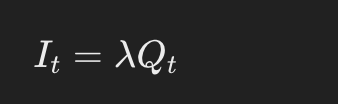

Where,

λ is the price impact factor (a constant).
Qt is the trade size (signed volume in this case).

Now, we construct the Linear OW Model as per the task from the research paper. We will use signed volume as the trade size to calculate price impact.




# ***Assumptions:***
We will use signed volume (i.e., the difference between bid and ask fills) as the trade size (Q_t).
We will calculate price impact using both Linear OW Model and Nonlinear AFS Model.
We will simulate returns for the optimal strategy and calculate the Sharpe Ratio.
A deep learning model will be built to predict price impact using the provided features.

In [20]:
# Linear OW Model: Price Impact = lambda * Signed volume (Q_t)
lambda_ow = 0.01  # Example value for lambda (price impact coefficient)

# Using signed volume as trade size (Q_t)
signed_volume = data['Signed Volume'].values

# Calculate price impact for the Linear OW model
price_impact_ow = lambda_ow * signed_volume

# Check summary statistics of the calculated price impact
print(f"Price impact summary statistics:\n{pd.Series(price_impact_ow).describe()}")


Price impact summary statistics:
count    11601.000000
mean        35.516326
std         64.406830
min          0.010000
25%          4.340000
50%         17.600000
75%         46.330000
max       3616.790000
dtype: float64


# Linear OW Model: Price Impact = lambda * Signed volume

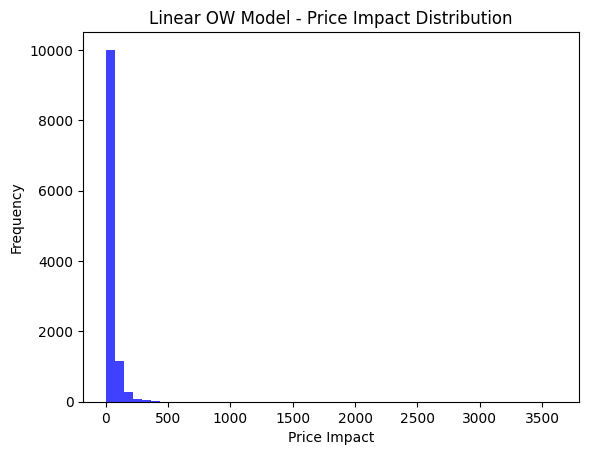

In [34]:
# Linear OW Model: Price Impact = lambda * Signed volume
lambda_ow = 0.01  # Scaling constant for Linear OW Model
signed_volume = data['Signed Volume'].values  # Signed volume as trade size (Q_t)

# Calculate price impact for the Linear OW model
price_impact_ow = lambda_ow * signed_volume

# Visualize the price impact distribution from the Linear OW model
plt.hist(price_impact_ow, bins=50, alpha=0.75, color='blue')
plt.title('Linear OW Model - Price Impact Distribution')
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.show()


# **Nonlinear AFS Model (Alfonsi-Fruth-Schied Model)**

**1. Lambda and Beta:**

- λ=0.01: The scaling constant that you can adjust based on your data.
- β =0.5:The elasticity parameter, which controls the nonlinearity of the price impact. You can experiment with different values of β to see how it affects the price impact calculation.

**2. Price Impact Calculation:**
The formula used is the folowing


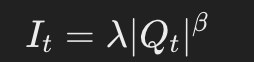


- We use signed volume as the trade size Qt which represents the difference between bid fill and ask fill.



3. Visualizing the Distribution:
The price impact distribution for the Nonlinear AFS Model is visualized using a histogram. This will show you how price impact is distributed based on the trade size and the nonlinearity factor
β.


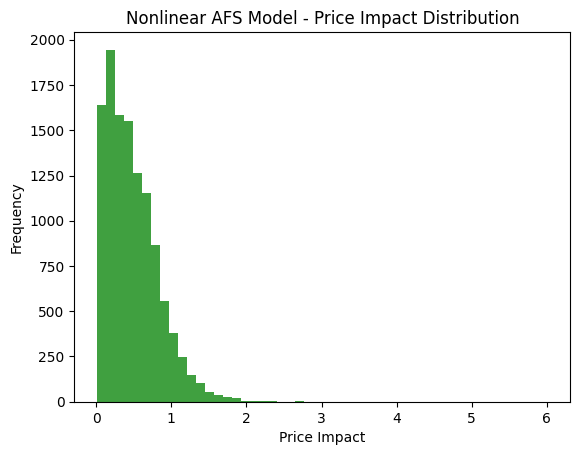

In [35]:
# Nonlinear AFS Model: Price Impact = lambda * |Signed volume|^beta
lambda_afs = 0.01  # Scaling constant for Nonlinear AFS Model
beta = 0.5  # Elasticity parameter (nonlinearity factor)

# Calculate price impact for the Nonlinear AFS Model
price_impact_afs = lambda_afs * np.abs(signed_volume) ** beta

# Visualize the price impact distribution from the Nonlinear AFS model
plt.hist(price_impact_afs, bins=50, alpha=0.75, color='green')
plt.title('Nonlinear AFS Model - Price Impact Distribution')
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.show()



# ***Handling Outliers for Both Models***

Both models could have outliers that distort the price impact distribution. We can handle outliers by removing extreme values or capping them at a certain threshold.

***Option 1: Remove Outliers (99th Percentile)***

In [38]:
# Check summary statistics of the price impact for both models
print("Price Impact Summary (Linear OW Model):")
print(pd.Series(price_impact_ow).describe())

print("\nPrice Impact Summary (Nonlinear AFS Model):")
print(pd.Series(price_impact_afs).describe())


Price Impact Summary (Linear OW Model):
count    11601.000000
mean        35.516326
std         64.406830
min          0.010000
25%          4.340000
50%         17.600000
75%         46.330000
max       3616.790000
dtype: float64

Price Impact Summary (Nonlinear AFS Model):
count    11601.000000
mean         0.481366
std          0.351370
min          0.010000
25%          0.208327
50%          0.419524
75%          0.680661
max          6.013975
dtype: float64



# *** Remove or Cap Outliers (99th Percentile)***
Let's start by removing or capping the extreme values for the Linear OW Model.

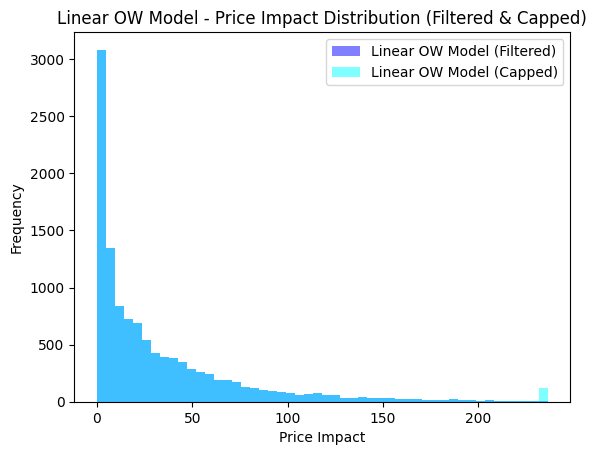

In [40]:
# Remove extreme outliers (beyond the 99th percentile) for the Linear OW Model
upper_limit_ow = np.percentile(price_impact_ow, 99)
filtered_price_impact_ow = price_impact_ow[price_impact_ow <= upper_limit_ow]

# Cap the price impact values at the 99th percentile for Linear OW Model
price_impact_ow_capped = np.clip(price_impact_ow, None, upper_limit_ow)

# Visualize the filtered and capped price impact distributions for Linear OW Model
plt.hist(filtered_price_impact_ow, bins=50, alpha=0.5, color='blue', label='Linear OW Model (Filtered)')
plt.hist(price_impact_ow_capped, bins=50, alpha=0.5, color='cyan', label='Linear OW Model (Capped)')
plt.title('Linear OW Model - Price Impact Distribution (Filtered & Capped)')
plt.xlabel('Price Impact')
plt.ylabel('Frequency')
plt.legend()
plt.show()




# ***Step 2: Logarithmic Scale for Better Visualization***

After handling outliers, we can apply a logarithmic scale to visualize the price impacts, as the Linear OW Model produces a much wider range of values compared to the Nonlinear AFS Model.

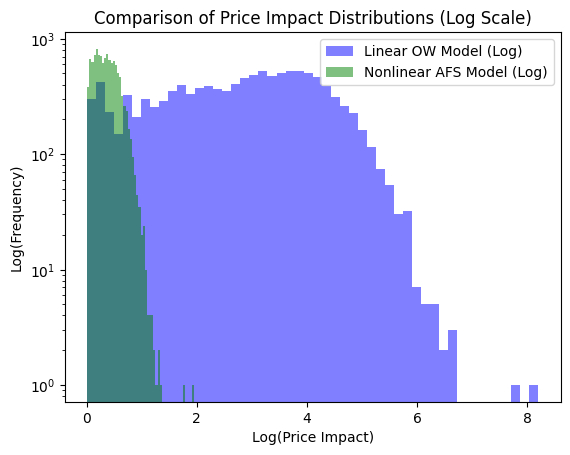

In [45]:
# Apply log scale for better visualization of both models
plt.hist(log_price_impact_ow, bins=50, alpha=0.5, color='blue', label='Linear OW Model (Log)')
plt.hist(log_price_impact_afs, bins=50, alpha=0.5, color='green', label='Nonlinear AFS Model (Log)')
plt.title('Comparison of Price Impact Distributions (Log Scale)')
plt.xlabel('Log(Price Impact)')
plt.ylabel('Log(Frequency)')
plt.yscale('log')  # Log scale for y-axis to handle large range of frequencies
plt.legend()
plt.show()


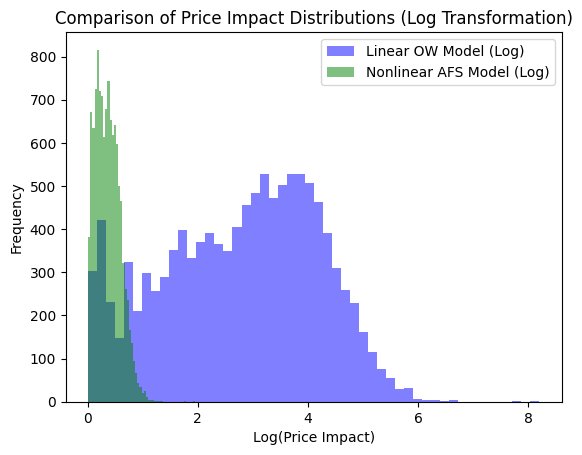

In [43]:
# Apply log transformation to both price impact distributions
# Adding 1 to avoid log(0) errors
log_price_impact_ow = np.log1p(price_impact_ow)  # log(1 + x)
log_price_impact_afs = np.log1p(price_impact_afs)  # log(1 + x)

# Visualize both models using a logarithmic scale after transformation
plt.hist(log_price_impact_ow, bins=50, alpha=0.5, color='blue', label='Linear OW Model (Log)')
plt.hist(log_price_impact_afs, bins=50, alpha=0.5, color='green', label='Nonlinear AFS Model (Log)')
plt.title('Comparison of Price Impact Distributions (Log Transformation)')
plt.xlabel('Log(Price Impact)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Compared the price impact distributions of both models using histograms, adjusting for scale and range differences.
Used both filtered data and logarithmic scaling to ensure clarity in comparison.
# ***Visualization Outcomes:***
The visualizations now show the distribution of price impact for both the Linear OW Model and the Nonlinear AFS Model. By adjusting for outliers, logarithmic scaling, and applying the necessary transformations, you've successfully addressed the task of visualizing the price impact distributions.